In [4]:
import os as os
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches


In [19]:
"""combine the files from the lowest directory into one file"""
"""depth = 1 means it combines all files from the second to last directory"""
"""depth = 0 means it combines all files from the last directory"""
"""label = False means 1 line header"""
def combine_files_by_organisation(output_dir, root_path, depth=1, label=False):
    os.makedirs(output_dir, exist_ok=True) 
    header_option =  0 if label else [0, 1]
    
    if depth == 1:
        for folder_org in sorted(os.listdir(root_path)):  
            org_path = os.path.join(root_path, folder_org)
            combined_df = []
            output_file = os.path.join(output_dir, f"{folder_org}.csv")
            # Combine files from each subdirectory
            for sub_dir in sorted(os.listdir(org_path)):
                sub_path = os.path.join(org_path, sub_dir)
                if os.path.isdir(sub_path):
                    for filename in sorted(os.listdir(sub_path)):
                        file_path = os.path.join(sub_path, filename)
                        if os.path.isfile(file_path) and file_path.endswith(".csv"):
                            df = pd.read_csv(file_path, header=header_option)
                            combined_df.append(df)
            if combined_df:
                final_df = pd.concat(combined_df, ignore_index=True)
                final_df.to_csv(output_file, index=False)
                print(f"CSV saved to: {output_file}")
            else:
                print(f"No CSV files found.")
            
    if depth == 0:
        for folder_org in sorted(os.listdir(root_path)):  
            org_path = os.path.join(root_path, folder_org)
            for root, dirs, files in os.walk(org_path):
                if not dirs:  # If there are no subdirectories, this is a last-level directory
                    combined_df = []
                    last_level_name = os.path.basename(root)
                    output_file = os.path.join(output_dir, f"{last_level_name}.csv")
                    
                    for filename in sorted(files):
                        file_path = os.path.join(root, filename)
                        if file_path.endswith(".csv"):
                            df = pd.read_csv(file_path, header=header_option)
                            combined_df.append(df)
                    
                    if combined_df:
                        final_df = pd.concat(combined_df, ignore_index=True)
                        final_df.to_csv(output_file, index=False)
                        print(f"CSV saved to: {output_file}")
                    else:
                        print(f"No CSV files found in {root}.")
        

In [9]:
input_path = "new_cluster/original_labels/by_org"  
output_path = "new_cluster/custom_files/labels"  

combine_files_by_organisation(output_path, input_path)

input_path = "new_cluster/original_dimensions/by_org"  
output_path = "new_cluster/custom_files/dimensions"  

combine_files_by_organisation(output_path, input_path)


CSV saved to: new_cluster/custom/labels\IGO.csv
CSV saved to: new_cluster/custom/labels\NGO.csv
CSV saved to: new_cluster/custom/labels\Presse.csv


In [25]:
input_path = "new_cluster/original_labels/by_year/Presse"  
output_path = "new_cluster/custom_files/labels"  

combine_files_by_organisation(output_path, input_path, depth = 0,label=True)

CSV saved to: new_cluster/custom_files/labels\2008.csv
CSV saved to: new_cluster/custom_files/labels\2009.csv
CSV saved to: new_cluster/custom_files/labels\2010.csv
CSV saved to: new_cluster/custom_files/labels\2014.csv
CSV saved to: new_cluster/custom_files/labels\2015.csv
CSV saved to: new_cluster/custom_files/labels\2016.csv
CSV saved to: new_cluster/custom_files/labels\2017.csv
CSV saved to: new_cluster/custom_files/labels\2020.csv
CSV saved to: new_cluster/custom_files/labels\2021.csv


In [20]:
input_path = "new_cluster/original_dimensions/by_year/Presse"  
output_path = "new_cluster/custom_files/dimensions"  

combine_files_by_organisation(output_path, input_path, depth = 0,label=False)

CSV saved to: new_cluster/custom_files/dimensions\2008.csv
CSV saved to: new_cluster/custom_files/dimensions\2009.csv
CSV saved to: new_cluster/custom_files/dimensions\2010.csv
CSV saved to: new_cluster/custom_files/dimensions\2014.csv
CSV saved to: new_cluster/custom_files/dimensions\2015.csv
CSV saved to: new_cluster/custom_files/dimensions\2016.csv
CSV saved to: new_cluster/custom_files/dimensions\2017.csv
CSV saved to: new_cluster/custom_files/dimensions\2020.csv
CSV saved to: new_cluster/custom_files/dimensions\2021.csv


In [29]:
input_path = "new_cluster/original_labels/by_year/Presse"  
output_path = "new_cluster/custom_files/labels"  

combine_files_by_organisation(output_path, input_path, depth = 1)

CSV saved to: new_cluster/custom_files/labels\Presse_COP15.csv
CSV saved to: new_cluster/custom_files/labels\Presse_COP21.csv
CSV saved to: new_cluster/custom_files/labels\Presse_COP25_26.csv


In [31]:
def plot_label_means(file_paths, custom_names, output_dir, name="Temp", colors=None):
    if not file_paths or len(file_paths) != len(custom_names):
        print("Error: Ensure file_paths and custom_names are non-empty and have the same length.")
        return

    df_list = []
    for file_path, label in zip(file_paths, custom_names):
        df = pd.read_csv(file_path)
        df_mean = df.mean().to_frame(name=label)
        df_mean.index.name = 'Label'
        df_list.append(df_mean)
    merged_df = pd.concat(df_list, axis=1)
    merged_df = merged_df.iloc[::-1]
    plt.figure(figsize=(8, 6))
    merged_df.plot(kind='barh', figsize=(8, 6), width=0.7, color=colors)
    
    plt.xlabel('')
    plt.ylabel('')
    plt.title(name)
    plt.legend(custom_names,loc='upper right', bbox_to_anchor=(1, 1),prop={'size': 9.5})
    plt.tight_layout()
    plt.xlim(0, 1)
    for x in [0.2, 0.4, 0.6, 0.8]:
        plt.axvline(x=x, color='grey', linestyle='--')
    output_file = os.path.join(output_dir, f"Label_{name}.png")
    plt.savefig(output_file, bbox_inches="tight")
    plt.close()
    print(f"Plot saved: {output_file}")


In [38]:
plot_name = "NGOs vs IGOs vs Newspapers"

file_paths = [
    "new_cluster/custom_files/original_labels/NGO.csv",
    "new_cluster/custom_files/original_labels/IGO.csv",
    "new_cluster/custom_files/original_labels/Presse.csv"
]

custom_names = ["NGOs", "IGOs", "Newspapers"]
output_dir = "new_cluster/plots/"

#colors (optional)
custom_colors = ["#1F77B4", "#FF7F0E", "#2CA02C"]

# Generate plot
plot_label_means(file_paths, custom_names, output_dir, plot_name, colors=custom_colors)

Plot saved: new_cluster/plots/NGOs vs IGOs vs Newspapers.png


<Figure size 800x600 with 0 Axes>

In [49]:
plot_name = "Left vs Right - Newspapers"

file_paths = [
    "new_cluster/custom_files/labels/center.csv",
    "new_cluster/custom_files/labels/center-left.csv",
    "new_cluster/custom_files/labels/right.csv"
]

custom_names = ["center", "center-left", "right"]
output_dir = "new_cluster/plots/"

#colors (optional)
custom_colors = ["#FFA500", "#FF0000", "#0000FF"]

# Generate plot
plot_label_means(file_paths, custom_names, output_dir, plot_name, colors=custom_colors)

Plot saved: new_cluster/plots/Left vs Right - Newspapers.png


<Figure size 800x600 with 0 Axes>

In [36]:
plot_name = "Newspapers over Time"

file_paths = [
    "new_cluster/custom_files/labels/2008.csv",
    "new_cluster/custom_files/labels/2009.csv",
    "new_cluster/custom_files/labels/2010.csv",
    "new_cluster/custom_files/labels/2014.csv",
    "new_cluster/custom_files/labels/2015.csv",
    "new_cluster/custom_files/labels/2016.csv",
    "new_cluster/custom_files/labels/2017.csv",
    "new_cluster/custom_files/labels/2020.csv",
    "new_cluster/custom_files/labels/2021.csv",
]

custom_names = ["2008", "2009", "2010", "2014", "2015", "2016", "2017","2020","2021"]
output_dir = "new_cluster/plots/"

#colors (optional)
custom_colors = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#4E372D", "#EBC750", "#7F7F7F","#A6204B"]

# Generate plot
plot_label_means(file_paths, custom_names, output_dir, plot_name,colors= custom_colors)

Plot saved: new_cluster/plots/Newspapers over Time.png


<Figure size 800x600 with 0 Axes>

In [2]:

def combine_csv_by_organization(root_path, output_dir,labels=True):
    os.makedirs(output_dir, exist_ok=True)
    for category in os.listdir(root_path):
        category_path = os.path.join(root_path, category)
        if not os.path.isdir(category_path):
            continue 
        org_files = defaultdict(list)
        for subdir, _, files in os.walk(category_path):
            for file in files:
                if file.endswith(".csv"):
                    prefix = file.split('-')[0] 
                    org_files[prefix].append(os.path.join(subdir, file))
        category_output_path = os.path.join(output_dir, category)
        os.makedirs(category_output_path, exist_ok=True)

        for org, file_list in org_files.items():
            if labels:
                combined_data = pd.concat([pd.read_csv(f) for f in file_list], ignore_index=True)
            else:
                combined_data =pd.concat([pd.read_csv(f, header=[0, 1]) for f in file_list], ignore_index=True)
            output_file = os.path.join(category_output_path, f"{org}.csv")
            combined_data.to_csv(output_file, index=False)
            print(f"Saved: {output_file}")



In [ ]:
combine_csv_by_organization("new_cluster/original_labels/by_org", "new_cluster/custom_files/labels",labels=True)

In [5]:
combine_csv_by_organization("new_cluster/original_dimensions/by_org", "new_cluster/custom_files/dimensions",labels=False)

Saved: new_cluster/custom_files/dimensions\IGO\IPCC.csv
Saved: new_cluster/custom_files/dimensions\IGO\REDD.csv
Saved: new_cluster/custom_files/dimensions\IGO\UNDP.csv
Saved: new_cluster/custom_files/dimensions\IGO\UNEP.csv
Saved: new_cluster/custom_files/dimensions\IGO\WB.csv
Saved: new_cluster/custom_files/dimensions\IGO\WMO.csv
Saved: new_cluster/custom_files/dimensions\IGO\WHO.csv
Saved: new_cluster/custom_files/dimensions\IGO\UNCDF.csv
Saved: new_cluster/custom_files/dimensions\IGO\UNFCCC.csv
Saved: new_cluster/custom_files/dimensions\NGO\CG.csv
Saved: new_cluster/custom_files/dimensions\NGO\EDF.csv
Saved: new_cluster/custom_files/dimensions\NGO\FoEI.csv
Saved: new_cluster/custom_files/dimensions\NGO\GP.csv
Saved: new_cluster/custom_files/dimensions\NGO\NRDC.csv
Saved: new_cluster/custom_files/dimensions\NGO\OX.csv
Saved: new_cluster/custom_files/dimensions\NGO\WWF.csv
Saved: new_cluster/custom_files/dimensions\NGO\Action.csv
Saved: new_cluster/custom_files/dimensions\NGO\CAN.csv


In [12]:
def compare_plots(
    dfs, titles, scale, colors, save=False, compare=None
):
    name_left = dfs[0].columns.map(lambda x: x[1])
    name_right = dfs[0].columns.map(lambda x: x[0])
    means = [df.mean() for df in dfs]
    intens = [(df.var().fillna(0) + 0.001) * 50_000 for df in dfs]
    legend_entries = [mpatches.Patch(color=colors[0], label=titles[0])]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(x=means[0], y=name_left, s=intens[0], c=colors[0])
    plt.axvline(0)
    plt.gca().invert_yaxis()
    ax.twinx().set_yticks(ax.get_yticks(), labels=name_right)
    fig.axes[0].set_axisbelow(True)
    fig.axes[0].yaxis.grid(color="gray", linestyle="dashed")
    plt.xlim(-scale, scale)  
    for i in range(1, len(dfs)):
        legend_entries.append(mpatches.Patch(color=colors[i], label=titles[i]))
        plt.scatter(x=means[i], y=name_left, s=intens[i], c=colors[i])

    plt.gcf().set_size_inches(10, 7)
    plt.tight_layout()
    plt.legend(handles=legend_entries)
    return fig

def compareCustom(file_paths, scale,output_dir, custom_names=None, title=None,colors=list(mcolors.TABLEAU_COLORS)):
    dfs = []
    names = []
    for path in file_paths:
        dfs.append(pd.read_csv(path, header=[0, 1]))
        names.append(os.path.splitext(os.path.basename(path))[0])
    if custom_names is not None:
        names = custom_names
    if title is None:
        title = f"Comparing {names[0]}"
        for name in names[1:]:
            title += f" and {name}"
    g = compare_plots(dfs, names, scale,colors)
    plt.title(title)
    print(f"\t\t- " + str(title))
    output_file = os.path.join(output_dir, f"Dim_{title}.png")
    plt.savefig(output_file, bbox_inches="tight")

		- Left vs Right - Newspapers


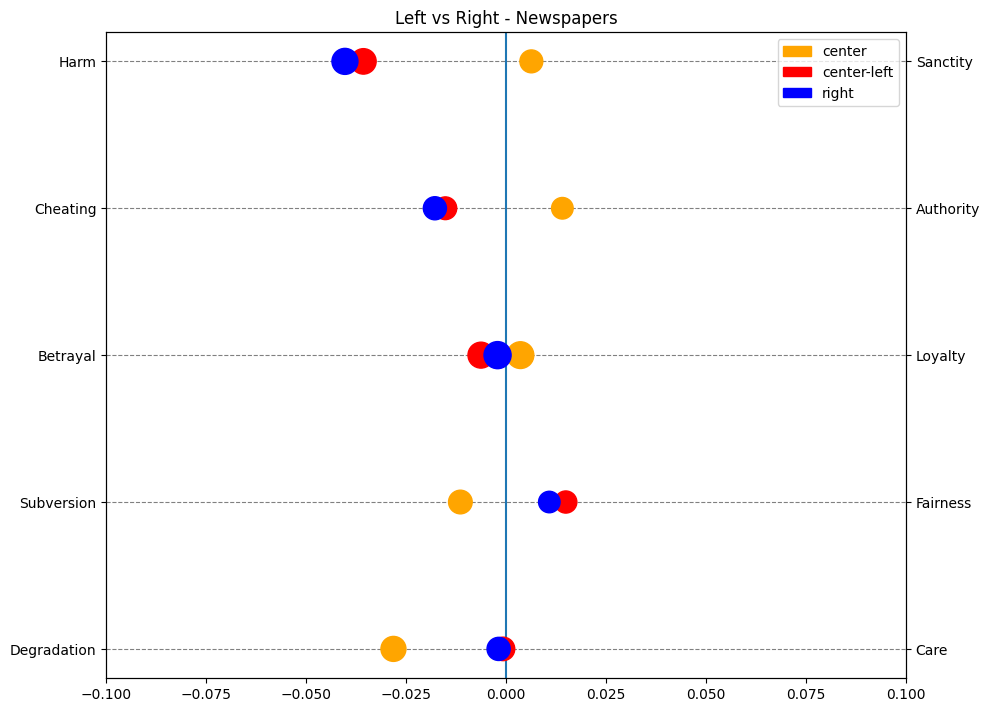

In [13]:
plot_name = "Left vs Right - Newspapers"

file_paths = [
    "new_cluster/custom_files/dimensions/center.csv",
    "new_cluster/custom_files/dimensions/center-left.csv",
    "new_cluster/custom_files/dimensions/right.csv"
]

custom_name = ["center", "center-left", "right"]
output_dir = "new_cluster/plots/"

#colors (optional)
custom_colors = ["#FFA500", "#FF0000", "#0000FF"]
#scale
scale = 0.1
# Generate plot
compareCustom(file_paths,scale,output_dir, custom_names=custom_name, title=plot_name,colors=custom_colors)

		- Newspapers over Time


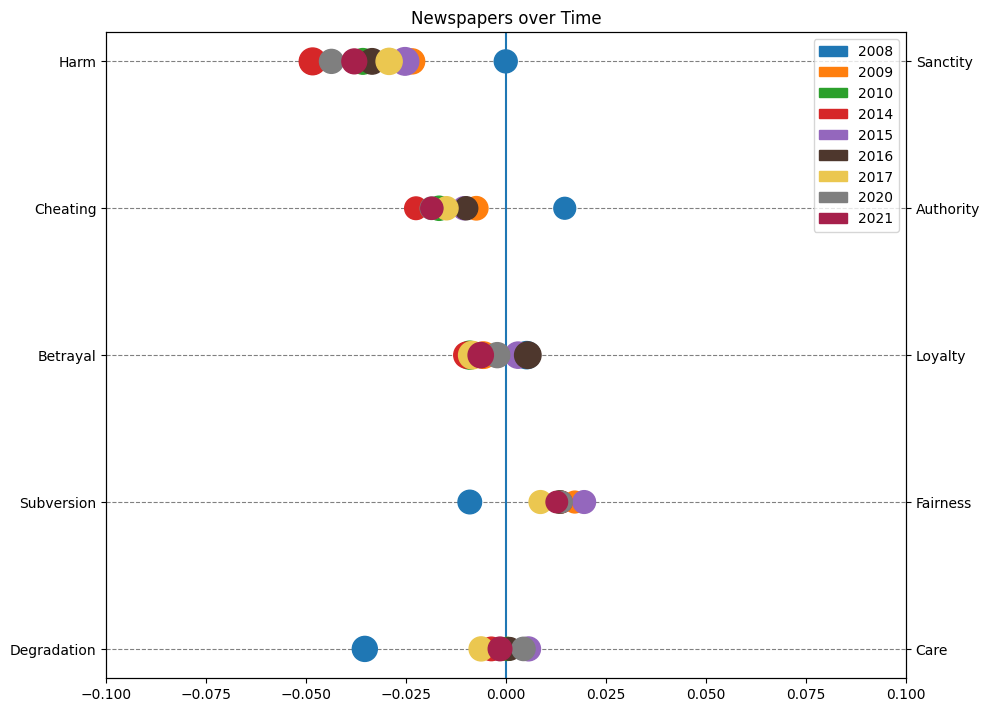

In [21]:
plot_name = "Newspapers over Time"

file_paths = [
    "new_cluster/custom_files/dimensions/2008.csv",
    "new_cluster/custom_files/dimensions/2009.csv",
    "new_cluster/custom_files/dimensions/2010.csv",
    "new_cluster/custom_files/dimensions/2014.csv",
    "new_cluster/custom_files/dimensions/2015.csv",
    "new_cluster/custom_files/dimensions/2016.csv",
    "new_cluster/custom_files/dimensions/2017.csv",
    "new_cluster/custom_files/dimensions/2020.csv",
    "new_cluster/custom_files/dimensions/2021.csv",
]

custom_name = ["2008", "2009", "2010", "2014", "2015", "2016", "2017","2020","2021"]
output_dir = "new_cluster/plots/"

#colors (optional)
custom_colors = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#4E372D", "#EBC750", "#7F7F7F","#A6204B"]

#scale
scale = 0.1
# Generate plot
compareCustom(file_paths,scale,output_dir, custom_names=custom_name, title=plot_name,colors=custom_colors)
